
## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import defaultdict

import torch
import torch.nn as nn
from torch.nn import functional as F
import torch.utils.data as data_utils
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
import sklearn
from torch.utils.data.sampler import SubsetRandomSampler

import sys,os
sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/CAMELS/MIEST/utils/"))
from imp import reload 
# Change in mymodule/'
import vib_utils
reload(vib_utils)
from vib_utils import *
import mist_utils
reload(mist_utils)
from mist_utils import *

import warnings
warnings.filterwarnings('ignore')

# Device Config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = 'cpu' # temporarily
# Fix random seeds for reproducibility
seed = 73
#torch.manual_seed(seed)
#np.random.seed(seed)a
import sys,os 
import matplotlib.pyplot as plt
import numpy as np
sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/myutils/"))
from plt_utils import generateAxesForMultiplePlots, remove_inner_axes
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import chi2_contingency
import optuna
# Dimension reduction and clustering libraries
import umap
#import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score


In [2]:
sim  = ['TNG','SIMBA']; field = 'T'
study_name = 'TNG_SIMBA_{}_cnn+cls_zero'.format(field)
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
mist = MIST(sim=sim, field=field, batch_size=32, 
            data_type = 'image',
            normalization=True,
            monopole = True,
            device=device)
mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="vib_cnn",num_trial=None)
#mist.make_plots_cnn(fname='cnn_test')
z = mist.get_latent_variable()
#mist.test_on_cnn('ASTRID', show_score=True)

15000
num_trial=47, params={'dropout': 0.28465175662763703, 'hidden': 10, 'lr': 0.0016376576428113107, 'wd': 5.686588593994635e-05, 'z_dim': 1869} 


## HI, VIB+CLS

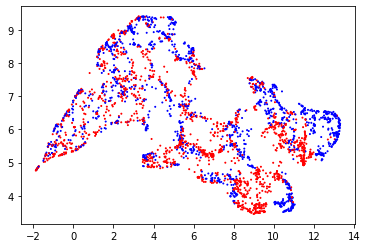

In [42]:
y=mist.test_dataset.tensors[1]
label = y[:,-2:]
clabel = ["b" if l == 1 else "r" for l in label[:,0]]
standard_embedding = umap.UMAP(n_neighbors=40,min_dist=0.01,n_components=20,random_state=3).fit_transform(z)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=clabel, s=1, cmap='Spectral');

## T, VIB

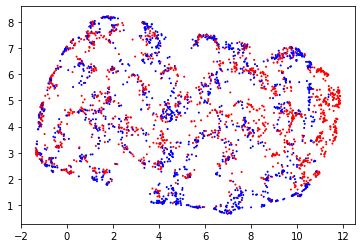

In [40]:
y=mist.test_dataset.tensors[1]
label = y[:,-2:]
clabel = ["b" if l == 1 else "r" for l in label[:,0]]
standard_embedding = umap.UMAP(n_neighbors=40,min_dist=0.001,n_components=100,random_state=3).fit_transform(z)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=clabel, s=1, cmap='Spectral');

## T, VIB+CLS

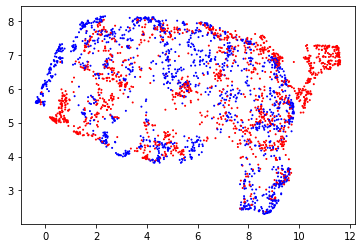

In [35]:
y=mist.test_dataset.tensors[1]
label = y[:,-2:]
clabel = ["b" if l == 1 else "r" for l in label[:,0]]
standard_embedding = umap.UMAP(n_neighbors=40,min_dist=0.01,n_components=20,random_state=3).fit_transform(z)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=clabel, s=1, cmap='Spectral');

## T, CNN

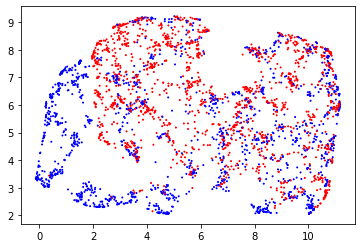

In [32]:
y=mist.test_dataset.tensors[1]
label = y[:,-2:]
clabel = ["b" if l == 1 else "r" for l in label[:,0]]
standard_embedding = umap.UMAP(n_neighbors=40,min_dist=0.01,n_components=20,random_state=3).fit_transform(z)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=clabel, s=1, cmap='Spectral');

## T test

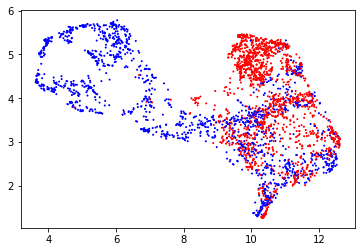

In [50]:
y=mist.test_dataset.tensors[1]
label = y[:,-2:]
clabel = ["b" if l == 1 else "r" for l in label[:,0]]
standard_embedding = umap.UMAP(n_neighbors=40,min_dist=0.01,n_components=20,random_state=3).fit_transform(z[:,2:20])
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=clabel, s=1, cmap='Spectral');

## Mtot

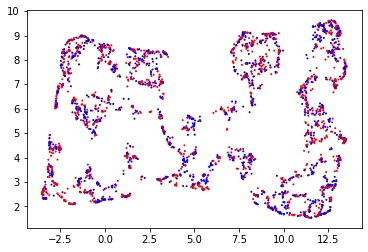

In [47]:
y=mist.test_dataset.tensors[1]
label = y[:,-2:]
clabel = ["b" if l == 1 else "r" for l in label[:,0]]
standard_embedding = umap.UMAP(n_neighbors=40,min_dist=0.01,n_components=20,random_state=3).fit_transform(z)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=clabel, s=1, cmap='Spectral');

## Mtot

In [51]:
y=mist.test_dataset.tensors[1]
label = y[:,-2:]
clabel = label[:,0]*0.3 + label[:,1]*0.7

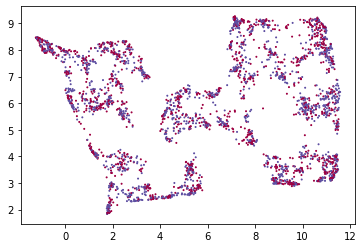

In [52]:
standard_embedding = umap.UMAP(n_neighbors=100,min_dist=0.001,n_components=100,random_state=2).fait_transform(z)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=clabel, s=1, cmap='Spectral');

In [3]:
sim  = ['TNG','SIMBA']; field = 'Mtot'
study_name = 'TNG_SIMBA_Mtot_cnn_multi'
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
mist = MIST(sim=sim, field=field, batch_size=32, 
            data_type = 'image',
            normalization=True,
            monopole = True,
            device=device)
mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="vib_cnn",num_trial=None)
mist.make_plots_cnn(fname='cnn_test')
mist.test_on_cnn('ASTRID', show_score=True)

FileNotFoundError: [Errno 2] No such file or directory: './model/optuna//model/optuna//TNG_SIMBA_Mtot_cnn_multi_31_vib.pt'

In [4]:
sim  = ['TNG','SIMBA']; field = 'Mtot'
study_name = 'TNG_SIMBA_Mtot_cnn+cls_multi'
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
mist = MIST(sim=sim, field=field, batch_size=32, 
            data_type = 'image',
            normalization=True,
            monopole = True,
            device=device)
mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="vib_cnn",num_trial=None)
mist.make_plots_cnn(fname='cnn_test')
mist.test_on_cnn('ASTRID', show_score=True)

FileNotFoundError: [Errno 2] No such file or directory: './model/optuna//model/optuna//TNG_SIMBA_Mtot_cnn+cls_multi_33_vib.pt'

In [46]:
sim  = ['TNG','SIMBA']; field = 'Mtot'
study_name = 'TNG_SIMBA_Mtot_cnn+cls_multi'
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
mist = MIST(sim=sim, field=field, batch_size=32, 
            data_type = 'image',
            normalization=True,
            monopole = True,
            device=device)

In [48]:
mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="vib_cnn+cls",num_trial=None)
auc = mist.get_auc_score()
print(auc)

0.5323073289311913


In [54]:
len(mist.val_indices)

3000

In [50]:
X, y = mist.valid_loader.dataset.tensors.

In [52]:
X.shape

torch.Size([30000, 1, 256, 256])